In [2]:
import pandas as pd
import numpy as np
import pylab as plt
plt.style.use('ggplot')

(0.8, 1.0075803079751728)

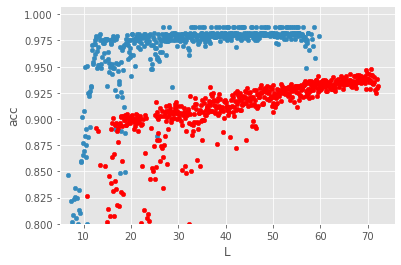

In [3]:
df=pd.read_csv('DSM2models/RESDSM2_.csv')
#df=df.groupby(['nest','maxdepth']).max().reset_index()
#df=df[df.nq_mean<28.9]
df=df.dropna()
df['L'] = [np.round(x,1) for x in df.nq_mean.values]
dfm=df.groupby(['L']).max().reset_index()
dfs=df.groupby(['L']).std().reset_index()
ax=dfm.plot.scatter(x='L',y='acc')
#dfs

#df1=pd.concat([pd.read_csv('/home/ishanu/Dropbox/RESphase1.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_4550.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESphase1_new.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_41063.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESphase1_125310.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_new_.csv')])
df1=pd.read_csv('P2models/RESphase2_.csv')

#df1=df1.groupby(['nest','maxdepth']).max().reset_index()

#df1=df1[df1.nq_mean<28.55]
df1=df1.dropna()
df1['L'] = [np.round(x,1) for x in df1.nq_mean.values]
df1m=df1.groupby(['L']).max().reset_index()
df1s=df1.groupby(['L']).std().reset_index()
df1m.plot.scatter(x='L',y='acc',ax=ax,color='r')
#dfs
plt.gca().set_xlim(5,None)
plt.gca().set_ylim(.8,None)


In [4]:

def quantize_dataframe(df):
    """
    Quantize the 'L' column of the dataframe to the nearest 0.5 and then aggregate 
    the other columns using the 'max' function within each collapsed interval.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame with 'L' and other numerical columns.

    Returns:
    - pd.DataFrame: Quantized DataFrame.
    """
    # Quantize the 'L' column
    #df['L_quantized'] = (df['L'] * 2).round() / 2
    df['L_quantized'] = (df['L']).round()
    
    # Define aggregation for other columns
    aggregation = {col: 'max' for col in df.columns if col != 'L_quantized'}
    aggregation['L'] = 'first'  # For 'L' column, just keep the first value (or replace with 'mean' if required)
    
    # Group by the quantized values
    df_quantized = df.groupby('L_quantized').agg(aggregation).reset_index(drop=True)
    
    # Rename 'L' column to its original name and drop the quantized column
    df_quantized = df_quantized.rename(columns={'L_quantized': 'L'})
    
    return df_quantized

In [5]:
dfm=quantize_dataframe(df).groupby('L').max().sort_values('L').acc.cummax()
df1m=quantize_dataframe(df1).groupby('L').max().sort_values('L').acc.cummax()


<AxesSubplot:xlabel='None-maxdepth', ylabel='nest'>

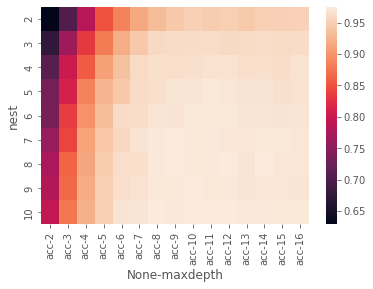

In [6]:
import seaborn as sns
F=2.65/np.sqrt(1500)
df['unc']= df.nq_std*F
df__=df[['acc','nest','maxdepth']]
df__=df__.groupby(['nest','maxdepth']).mean().reset_index()
df___=df__.pivot(index='nest',columns='maxdepth')
sns.heatmap(df___)

<AxesSubplot:xlabel='None-maxdepth', ylabel='nest'>

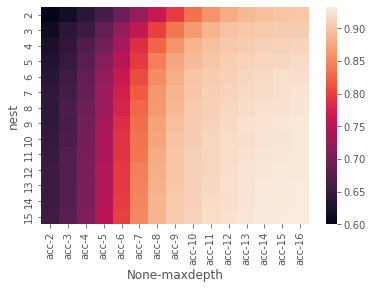

In [7]:
import seaborn as sns
F=2.65/np.sqrt(1500)
df1['unc']= df1.nq_std*F
df__=df1[['acc','nest','maxdepth']]
df__=df__.groupby(['nest','maxdepth']).mean().reset_index()
df___=df__.pivot(index='nest',columns='maxdepth')
sns.heatmap(df___)

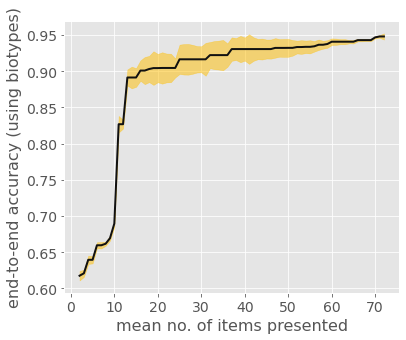

In [8]:
Lqr=df1.groupby('L_quantized').count().run
df1s=df1.groupby('L_quantized').std().sort_index().acc*(2/np.sqrt(Lqr.values))
df1m=df1.groupby('L_quantized').max().sort_index().acc.cummax()

fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
#dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
#df1m=df1.groupby('L').max().sort_index().acc.cummax().ewm(alpha=.4).mean()
#plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(df1m.index.values,df1m+df1s+epx,df1m-df1s-epx,alpha=.5,color='#FFBF00')
#dfm.plot(color='k',lw=LW)
df1m.plot(color='#111111',lw=LW)
#plt.gca().set_ylim(.82,.95)
#plt.gca().set_xlim(10,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy (using biotypes)',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase2results_new/Lvsacc_onlybiotype.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s),rsuffix='_std').to_excel('./phase2results_new/itemsVsacc.xlsx')

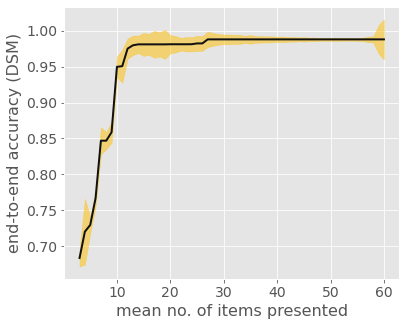

In [9]:
Lqr=df.groupby('L_quantized').count().run
df1s=df.groupby('L_quantized').std().sort_index().acc.ewm(alpha=.51).mean()*(2/np.sqrt(Lqr.values))
df1m=df.groupby('L_quantized').max().sort_index().acc.cummax()

fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
#dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
#df1m=df1.groupby('L').max().sort_index().acc.cummax().ewm(alpha=.4).mean()
#plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(df1m.index.values,df1m+df1s+epx,df1m-df1s-epx,alpha=.5,color='#FFBF00')
#dfm.plot(color='k',lw=LW)
df1m.plot(color='#111111',lw=LW)
#plt.gca().set_ylim(.82,.95)
#plt.gca().set_xlim(10,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy (DSM)',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase2results_new/Lvsacc_onlyDSM.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s),rsuffix='_std').to_excel('./phase2results_new/itemsVsacc_DSM.xlsx')

In [10]:
df1[df1.acc.between(.91,.92)].sort_values('L',ascending=False)

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,L,L_quantized,unc
5876,0.97,0.95,0.916636,0.863635,0.950705,71.287072,2.626153,13,15,27,71.3,71.0,0.179688
5861,0.95,0.99,0.918281,0.917701,0.821641,70.595057,2.680995,13,14,27,70.6,71.0,0.183441
5874,0.97,0.95,0.918215,0.870968,0.951508,70.306084,2.644573,11,15,27,70.3,70.0,0.180949
1044,0.95,0.95,0.911759,0.911250,0.936348,70.295627,2.960298,11,15,4,70.3,70.0,0.202552
1884,0.95,0.97,0.913296,0.909602,0.872874,69.820342,2.554919,11,15,8,69.8,70.0,0.174814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,0.95,0.95,0.910685,0.918276,0.921162,28.202471,4.232981,14,3,6,28.2,28.0,0.289632
4859,0.99,0.94,0.913741,0.826464,0.945489,27.994297,4.301380,16,3,23,28.0,28.0,0.294312
3809,0.99,0.94,0.912452,0.816486,0.949558,27.494297,5.878440,16,3,18,27.5,28.0,0.402219
869,0.94,0.99,0.910360,0.917969,0.808213,26.172053,4.164381,16,3,4,26.2,26.0,0.284938


In [ ]:
# we can choose 15-3 for L~25 (acc~.92)
# we can choose 14-2 for L~13 items presented (acc~0.89)

In [ ]:
#df1m_=df1.groupby('L').mean()

In [ ]:
#df1m_.reset_index()[df1m_.reset_index().L.between(20,32)].set_index('L').acc.plot()

In [11]:
# get importance bounds
modelname='P2models/P2_12_10_29.mod'
# load model
import dill
with open(modelname,'rb') as f:
    M=dill.load(f)
    
def getCF(Rs,LABELS=['B1','B2','B3']):  
    CF=np.zeros([3,3])
    s2=Rs.s1
    s3=Rs.s2
    c2=Rs.c1
    c3=Rs.c2
    CF=[[c2*c3,1-c2,c2*(1-c3)],[(1-s2)*(1-s3),s2,(1-s2)*s3],[c2*(1-s3),1-c2,c2*s3]]

    CF=pd.DataFrame(CF,columns=LABELS)
    CF.index=CF.columns
    return CF

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [13]:
df1_=df1[(df1.nest>=2) & (df1.maxdepth>=13)]
S=pd.DataFrame()
count=0
for i in df1_.iterrows():
    count=count+1
    cf=getCF(i[1])
    cfvar=getCF(i[1])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('phase2results_new/confusion_phase2.csv')
S_

,B1,B2,B3
B1,"0.933 (0.903, 0.963)","0.037 (0.017, 0.057)","0.03 (0.009, 0.051)"
B2,"0.011 (0.006, 0.016)","0.894 (0.853, 0.935)","0.095 (0.056, 0.134)"
B3,"0.102 (0.058, 0.146)","0.037 (0.017, 0.057)","0.861 (0.811, 0.911)"


In [12]:
df_=df[(df.nest>=2) & (df.maxdepth>=13)]
S=pd.DataFrame()
count=0
for i in df_.iterrows():
    count=count+1
    cf=getCF(i[1],LABELS=['D1','D2',"D5"])
    cfvar=getCF(i[1],LABELS=['D1','D2',"D5"])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('phase2results_new/confusion_dsm.csv')
S_

,D1,D2,D5
D1,"0.97 (0.949, 0.991)","0.014 (0.001, 0.027)","0.015 (0.0, 0.03)"
D2,"0.002 (-0.002, 0.006)","0.979 (0.943, 1.015)","0.019 (-0.014, 0.052)"
D5,"0.091 (0.052, 0.13)","0.014 (0.001, 0.027)","0.895 (0.853, 0.937)"


In [14]:

xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'
df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
df=df.join(xf)#.head()
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
df=df.dropna()
df0=df
feature_names=df.drop('Biotype',axis=1).columns
#feature_names=feature_names[1:]

In [20]:
#MODELS

['P2models/P2_14_13_28.mod',
 'P2models/P2_14_8_11.mod',
 'P2models/P2_14_6_21.mod',
 'P2models/P2_14_11_27.mod',
 'P2models/P2_14_7_4.mod',
 'P2models/P2_14_2_1.mod',
 'P2models/P2_14_7_7.mod',
 'P2models/P2_14_13_22.mod',
 'P2models/P2_14_8_21.mod',
 'P2models/P2_14_9_17.mod',
 'P2models/P2_14_4_25.mod',
 'P2models/P2_14_4_13.mod',
 'P2models/P2_14_7_22.mod',
 'P2models/P2_14_5_20.mod',
 'P2models/P2_14_12_22.mod',
 'P2models/P2_14_15_28.mod',
 'P2models/P2_14_7_15.mod',
 'P2models/P2_14_14_4.mod',
 'P2models/P2_14_12_26.mod',
 'P2models/P2_14_2_21.mod',
 'P2models/P2_14_5_21.mod',
 'P2models/P2_14_4_11.mod',
 'P2models/P2_14_6_6.mod',
 'P2models/P2_14_11_19.mod',
 'P2models/P2_14_11_10.mod',
 'P2models/P2_14_12_0.mod',
 'P2models/P2_14_3_7.mod',
 'P2models/P2_14_6_28.mod',
 'P2models/P2_14_12_8.mod',
 'P2models/P2_14_4_18.mod',
 'P2models/P2_14_10_12.mod',
 'P2models/P2_14_11_28.mod',
 'P2models/P2_14_10_25.mod',
 'P2models/P2_14_6_27.mod',
 'P2models/P2_14_3_12.mod',
 'P2models/P2_

In [22]:
import glob
MODELS=glob.glob('P2models/P2_14_*')+glob.glob('P2models/P2_15_*')
I={}
for modelname in MODELS:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP3=M[3]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio3_vs_all':IMP3,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    I[modelname]=IMPdf.transpose().reset_index()
I=pd.concat(I.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

In [23]:
from itertools import cycle, islice
custom_colors = list(islice(cycle(['#AF1D1D','#4575F0','#1AB44A']), None, 3))
plt.style.use('seaborn-whitegrid')

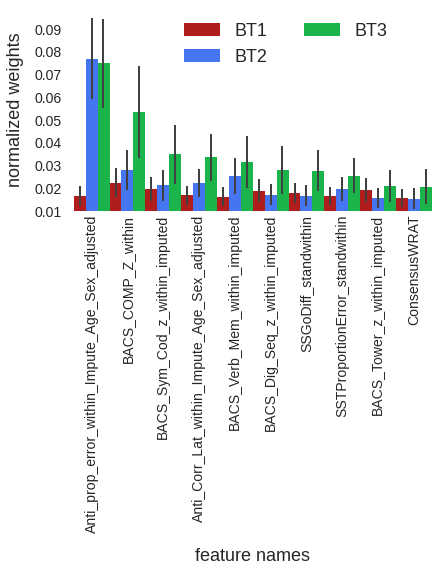

In [24]:
fig=plt.figure(figsize=[6,3.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()

sImean=Imean.sort_values('bio3_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsd=Isd.loc[:,sImean.columns]


FS=18
FS2=14
w=0.33
LW=2
COL='.25'



sImean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImean.columns)), sImean.loc['bio2_vs_all',:].values,
             sIsd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))-w, sImean.loc['bio1_vs_all',:].values,
             sIsd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))+w, sImean.loc['bio3_vs_all',:].values,
             sIsd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=2)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=10)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2, rotation=0);
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('phase2results_new/sorted_impPhase2.png',dpi=300,bbox_inches='tight',transparent=True)

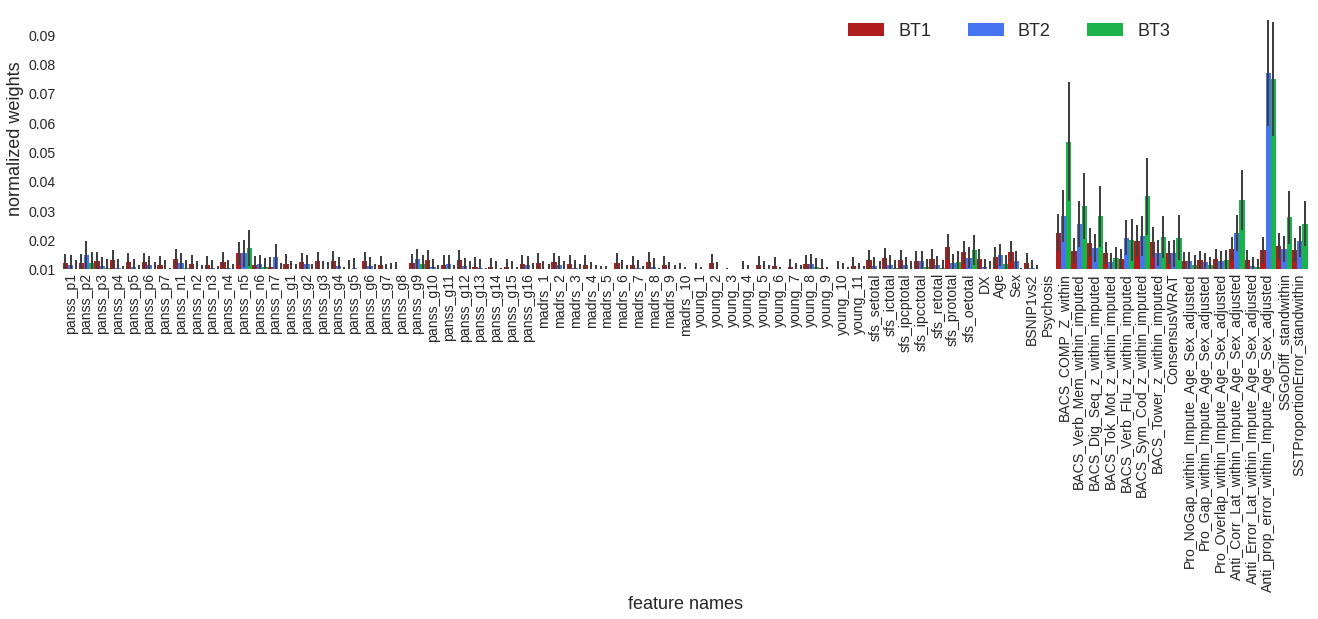

In [25]:
fig=plt.figure(figsize=[20,4.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()
FS=18
FS2=14
w=0.33
LW=2
COL='.25'
Imean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(Imean.columns)), Imean.loc['bio2_vs_all',:].values,
             Isd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))-w, Imean.loc['bio1_vs_all',:].values,
             Isd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))+w, Imean.loc['bio3_vs_all',:].values,
             Isd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(feature_names,rotation=90);
#plt.legend(bbox_to_anchor=(.5, 1), loc='upper left', borderaxespad=0)
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);

plt.savefig('phase2results_new/impPhase2.png',dpi=300,bbox_inches='tight',transparent=True)

In [26]:
Imean.transpose().join(Isd.transpose(),rsuffix='_cnfband').to_excel('./phase2results_new/feature_impotance_biotype.xlsx')

In [27]:
custom_colors = list(islice(cycle(['.1','.4','.7']), None, 3))

In [28]:
import glob
MODELSdsm=glob.glob('DSM2models/DSM2_13_*')+glob.glob('DSM2models/DSM2_14_*')
Idsm={}
for modelname in MODELSdsm:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP5=M[5]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio5_vs_all':IMP5,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    Idsm[modelname]=IMPdf.transpose().reset_index()
Idsm=pd.concat(Idsm.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


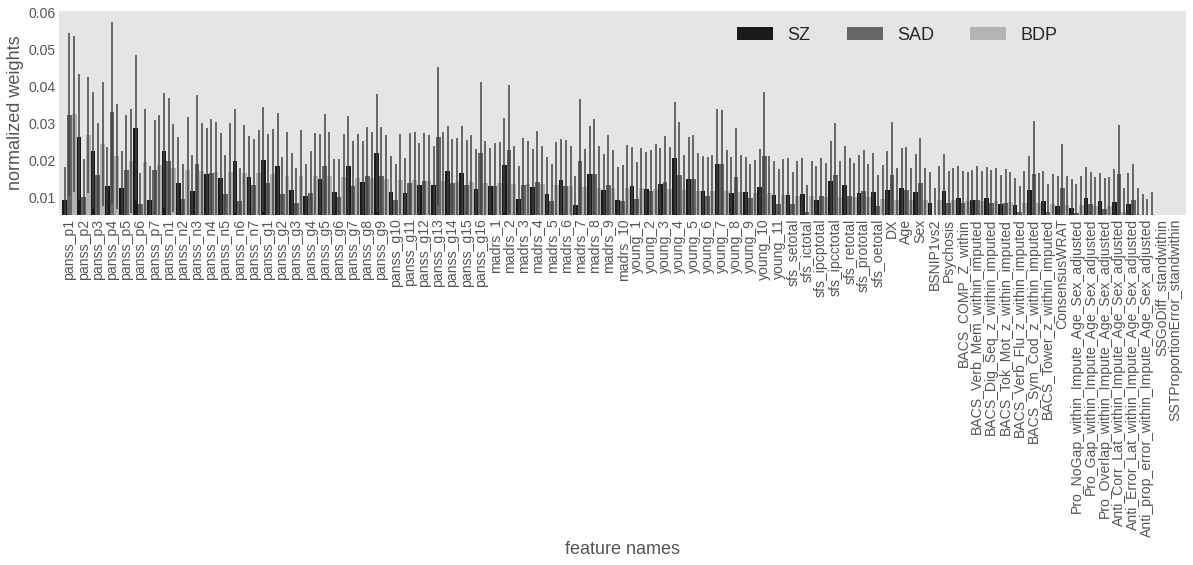

In [29]:
fig=plt.figure(figsize=[18,3.5])
Imeandsm=Idsm.groupby('index').mean()
Isddsm=Idsm.groupby('index').std()

Imeandsm=Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False)
Isddsm=Isddsm.transpose()
Isddsm=Isddsm.loc[Imeandsm.index,:]
Isddsm=Isddsm.transpose()
Imeandsm=Imeandsm.transpose()

FS=18
FS2=14

w=0.33
LW=2
COL='.25'
Imeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(Imeandsm.columns)), Imeandsm.loc['bio2_vs_all',:].values,
             Isddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imeandsm.columns))-w, Imeandsm.loc['bio1_vs_all',:].values,
             Isddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imeandsm.columns))+w, Imeandsm.loc['bio5_vs_all',:].values,
             Isddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.0051,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('phase2results_new/impDSM2.png',dpi=300,bbox_inches='tight',transparent=True)

In [30]:
sImeandsm=Imeandsm.sort_values('bio5_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsddsm=Isddsm.loc[:,sImeandsm.columns]


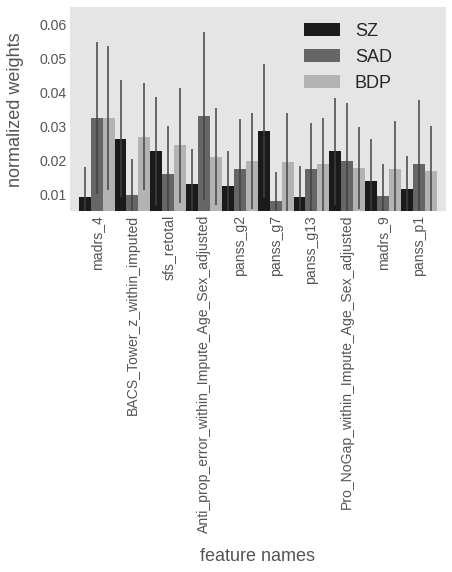

In [32]:
fig=plt.figure(figsize=[6,3.5])
FS=18
FS2=14

w=0.33
LW=2
COL='.25'
sImeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImeandsm.columns)), sImeandsm.loc['bio2_vs_all',:].values,
             sIsddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))-w, sImeandsm.loc['bio1_vs_all',:].values,
             sIsddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))+w, sImeandsm.loc['bio5_vs_all',:].values,
             sIsddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=1)
ax=plt.gca()
ax.set_ylim(0.0051,0.065)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=15)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('phase2results_new/sorted_impDSM.png',dpi=300,bbox_inches='tight',transparent=True)

In [33]:
Imeandsm

,madrs_4,BACS_Tower_z_within_imputed,sfs_retotal,Anti_prop_error_within_Impute_Age_Sex_adjusted,panss_g2,panss_g7,panss_g13,Pro_NoGap_within_Impute_Age_Sex_adjusted,madrs_9,panss_p1,...,young_9,madrs_5,madrs_10,Sex,young_10,panss_g5,panss_g8,young_3,Psychosis,BSNIP1vs2
index,,,,,,,,,,,,,,,,,,,,,
bio1_vs_all,0.009214,0.026301,0.022550,0.013037,0.012376,0.028635,0.009176,0.022552,0.013845,0.011637,...,0.008769,0.007517,0.007049,0.009564,0.008741,0.008489,0.007951,0.004966,0.0,0.0
bio2_vs_all,0.032329,0.009896,0.015959,0.032893,0.017329,0.008005,0.017311,0.019738,0.009492,0.018818,...,0.005823,0.012474,0.005583,0.008141,0.006690,0.016195,0.009240,0.003675,0.0,0.0
bio5_vs_all,0.032388,0.026841,0.024324,0.020973,0.019785,0.019412,0.018727,0.017789,0.017413,0.016954,...,0.008120,0.007794,0.007735,0.007498,0.007431,0.006008,0.005416,0.005230,0.0,0.0


In [34]:
Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False).to_excel('phase2results_new/dsmfeaturessorted.xlsx')
Imean.transpose().sort_values('bio3_vs_all',ascending=False).to_excel('phase2results_new/phase2featuressorted.xlsx')

In [35]:

def getAVlen(clf,X,cid=0):
    RES=pd.DataFrame(columns=['Lmean','Lstd','compid'])
    count=0
    threshold={}
    feature={}
    node_indicator={}
    leaf_id={}

    for i in clf.estimators_:
        feature[count]= i.tree_.feature
        node_indicator[count] = i.tree_.decision_path(X)
        count=count+1
    
    #print(count)
    L=[]
    LL=[]
    for sample_id in np.arange(len(X)):
        L=[]
        for i in range(count-1):
            L=L+list(feature[i][node_indicator[i].indices[node_indicator[i].indptr[sample_id] : node_indicator[i].indptr[sample_id + 1]]][1:-1])
        LL=np.append(LL,len(list(set(L))))
    L=list(set(L))
    
    RES['Lmean']=[np.mean(LL)]
    RES['Lstd']=[np.std(LL)]
    RES['compid']=[cid]
    return RES    
    


In [36]:
Ef=pd.read_excel('./2022summer/adeptphase3/BIOTYPES_HC_withBiofactors_21_1008.xlsx')
Ef_=Ef[['DSM','DSM String']].dropna()
Ef_.DSM=[int(x) for x in Ef_.DSM.values]
xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'
df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
df=df.join(xf)
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
Xphase1=df.dropna().iloc[:,1:].values.astype(np.float32)

df=df.join(Ef_).dropna()#[['DSM','Biotype']]
df=df[df['DSM String']!='HC'].drop(['Biotype','DSM String'],axis=1)
Xdsm=df.drop('DSM',axis=1).values.astype(np.float32)

In [38]:
def getModelAvLen(modelfile='P2models/P2_10_3_0.mod'):
    import sys
    import warnings

    if not sys.warnoptions:
        warnings.simplefilter("ignore")    
        
    with open(modelfile,'rb') as f:
        M=dill.load(f)
    return pd.concat([getAVlen(M[key]['estimator'],Xphase1,cid=key) for key in M.keys()])

In [43]:
import glob
MODELS=glob.glob('P2models/P2_14_2_*.mod')#+glob.glob('P2models/P2_15_3_*.mod')
af=pd.concat([getModelAvLen(model)for model in MODELS])
af

,Lmean,Lstd,compid
0,8.991445,2.549309,1
0,8.348859,2.566783,2
0,8.630228,2.680581,3
0,9.263308,2.763502,1
0,9.269011,2.944491,2
...,...,...,...
0,8.673954,2.771591,2
0,9.228137,2.735356,3
0,9.997148,2.336069,1
0,8.070342,2.553756,2


In [44]:
af[af.compid==1].mean()

Lmean     9.688213
Lstd      2.685293
compid    1.000000
dtype: float64

In [45]:
af[af.compid==2].mean()

Lmean     8.741413
Lstd      2.679687
compid    2.000000
dtype: float64

In [46]:
af[af.compid==3].mean()

Lmean     8.653549
Lstd      2.741438
compid    3.000000
dtype: float64

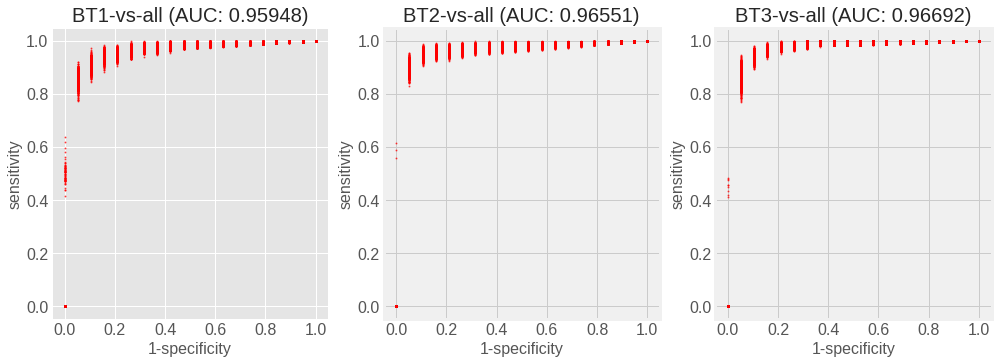

In [47]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='P2models/P2_14_2_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase2results_new/ROC_phase2.png',dpi=400,bbox_inches='tight',transparent=True)


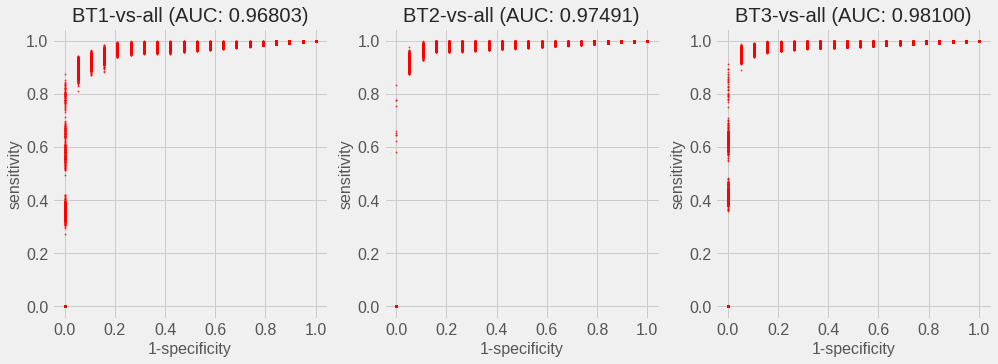

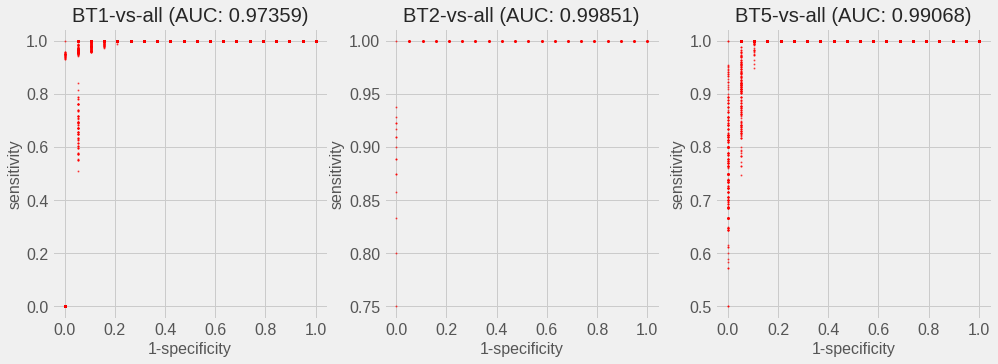

In [49]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='P2models/P2_15_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase2results_new/ROCvall_phase2_max.png',dpi=400,bbox_inches='tight',transparent=True)



modelfile='DSM2models/DSM2_12_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,5,plt.gca(),FS=16)
plt.savefig('./phase2results_new/ROCvall_clinical_DSM.png',dpi=400,bbox_inches='tight',transparent=True)



In [ ]:
rho=0.04
s1=.388
PPV1=.146
s=.62
PPV=.178
A= (1 - ((s1*rho)/PPV1))
C= (1-s1)/(1-((s1*rho)/PPV1))
B=A*s*rho*((1/PPV)-1)*C
A,B